In [1]:
%run geometria.ipynb

In [2]:
Tolerance = 10e-12

# Funkcje pomocnicze

In [3]:
def det(a, b, c):
    return a[0] * b[1] + b[0] * c[1] + a[1] * c[0] - c[0] * b[1] - b[0] * a[1] - a[0] * c[1]

def orient(a, b, c):
    determinant = det(a, b, c)
    if determinant > Tolerance: # lewa strona
        return 1
    elif determinant < -Tolerance: # prawa strona
        return -1
    else: # współliniowe
        return 0
    
def get_lines(CH):
    lines = [] 
    for i in range(len(CH)):
        lines.append([CH[i], CH[(i+1)%len(CH)]])
    return lines

# Główny algorytm

In [4]:
def przyrostowy(points):
    scenes=[]
    scenes.append(Scene([PointsCollection(points, color = 'hotpink')]))
    
    # Punkty zostają posortowane. W ten sposób rozwiązany zostaje problem sprawdzania czy punkt nie należy do wnętrza otoczki.
    sorted_points = sorted(points, key = lambda p: (p[0],p[1]))
    
    # Z postortowanego zbioru usuwane są punkty o takiej samej współrzędnej x, z pominięciem tych punktów, 
    # które dla tego samego x mają najmneijszą i największą wartość y.
    new_points = []
    new_points.append(sorted_points[0])
    last_x = sorted_points[0][0]
    i = 1
    while i < len(sorted_points):
        if sorted_points[i][0] != last_x:
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        else:
            while i < len(sorted_points) and sorted_points[i][0] == last_x:
                i+=1
            i-=1
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        i+=1
    
    # Trzy pierwsze punkty z new_points dodawane są do otoczki
    CH = []
    CH.append(new_points[0])
    CH.append(new_points[1])
    CH.append(new_points[2])
    lines = get_lines(CH)
    scenes.append(Scene([PointsCollection(points, color = 'hotpink')],
                       [LinesCollection(deepcopy(lines), color = 'lime')]))
    
    for i in range(3, len(new_points)):
        n = len(CH)
        upper_tangent_point = CH[-1]
        upper_index = n-1
        lower_tangent_point = CH[-1]
        lower_index = n-1
        point = new_points[i]
          
        # Szukany jest punkt, przez który przechodzi dolna styczna poprowadzona z aktualnie sprawdzanego punktu 
        while orient(point, lower_tangent_point, CH[(lower_index+1)%n]) != -1:
            lower_tangent_point = CH[(lower_index+1)%n]   
            lower_index = (lower_index+1)%n
            
        # Szukany jest punkt, przez który przechodzi górna styczna poprowadzona z aktualnie sprawdzanego punktu
        while orient(point, upper_tangent_point, CH[(upper_index+n-1)%n]) != 1:
            upper_tangent_point = CH[(upper_index+n-1)%n]   
            upper_index = (upper_index+n-1)%n
        
        
        scenes.append(Scene([PointsCollection(points, color = 'hotpink'),
                            PointsCollection(CH, color = 'green')],
                           [LinesCollection(deepcopy(lines), color = 'lime'),
                           LinesCollection([[point, upper_tangent_point], [point, lower_tangent_point]], color ='fuchsia')]))
    
        
        # Aktualizujemy otoczkę poprzez dodanie aktualnie rozpatrywanego punktu i tylko tych punktów otoczki, 
        # które nie znajdują się wewnątrz
        tmp_CH = []
        tmp_index =  lower_index
        tmp = lower_tangent_point
        tmp_CH.append(tmp)
        while tmp != upper_tangent_point:
            tmp_index = (tmp_index+1)%n
            tmp = CH[tmp_index]
            tmp_CH.append(tmp)
        tmp_CH.append(point)
        CH = deepcopy(tmp_CH)
        
        lines = get_lines(CH)
        
        scenes.append(Scene([PointsCollection(points, color = 'hotpink'),
                            PointsCollection(CH, color = 'green')],
                           [LinesCollection(deepcopy(lines), color = 'lime')]))
        
    return CH, scenes

# Testowanie

Liczba punktów otoczki:  4
Punkty otoczki:  [(3, 0), (0, 0), (0, 3), (3, 3)]


<IPython.core.display.Javascript object>


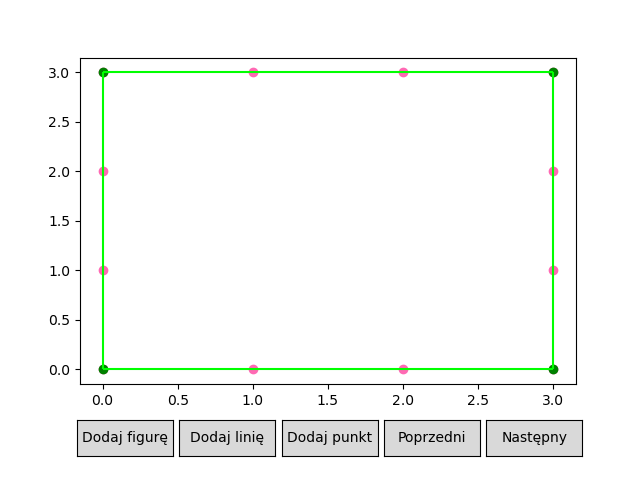

In [5]:
data = [(0,0),(1,0),(2,0),(3,0),(0,1),(0,2),(0,3),(3,3),(3,1),(3,2),(1,3),(2,3)]
CH, scenes = przyrostowy(data)
print("Liczba punktów otoczki: ", len(CH))
print("Punkty otoczki: ", CH)
plot = Plot(scenes=scenes)
plot.draw()

Liczba punktów otoczki:  11
Punkty otoczki:  [(99.3728556355755, 2.6000930037601067), (76.216863914028, 1.140611498633548), (7.238218996058443, 4.741086838661001), (4.039537497974699, 5.636283537327069), (0.3034503073852002, 64.77600909111729), (9.318021249806685, 96.885142949889), (71.5585494503196, 99.39171665825924), (96.05115955120948, 97.03933404355168), (98.33893271147097, 76.09081154776098), (99.05659393941541, 38.83768996501801), (99.53947531085718, 3.1567830171451927)]


<IPython.core.display.Javascript object>


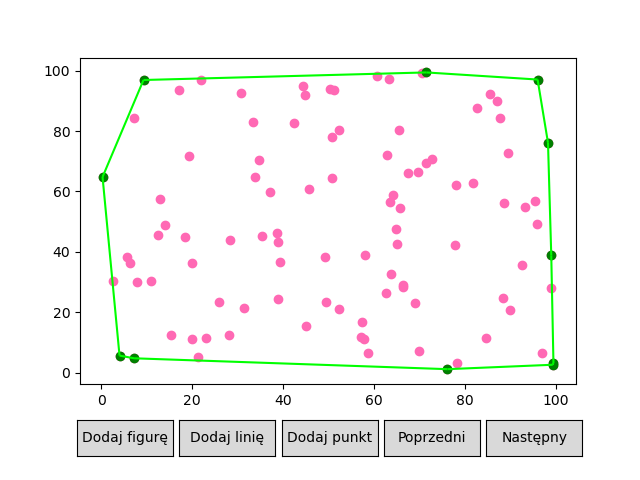

In [6]:
def generate_points(amount, low, high):
    a = np.random.rand(amount).astype(np.float64) * (high - low) + low
    b = np.random.rand(amount).astype(np.float64) * (high - low) + low
    return list(zip(a, b))

data = generate_points(100, 0, 100)
CH, scenes = przyrostowy(data)
print("Liczba punktów otoczki: ", len(CH))
print("Punkty otoczki: ", CH)
plot = Plot(scenes=scenes)
plot.draw()